In [3]:
!pip install dionysus
!pip install zarr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from google.colab import drive
from google.colab import files
import os

drive.mount('/content/drive',force_remount=True)
os.chdir("/content/drive/MyDrive/NASA/DATA/data")
!ls -ltr

Mounted at /content/drive
total 4753
drwx------ 2 root root   4096 Jan 29 18:35 Tile_0_1.zarr
drwx------ 2 root root   4096 Jan 29 18:35 Tile_0_17.zarr
drwx------ 2 root root   4096 Jan 29 18:35 Tile_0_16.zarr
drwx------ 2 root root   4096 Jan 29 18:35 Tile_0_15.zarr
drwx------ 2 root root   4096 Jan 29 18:35 Tile_0_14.zarr
drwx------ 2 root root   4096 Jan 29 18:35 Tile_0_13.zarr
drwx------ 2 root root   4096 Jan 29 18:35 Tile_0_12.zarr
drwx------ 2 root root   4096 Jan 29 18:35 Tile_0_11.zarr
drwx------ 2 root root   4096 Jan 29 18:35 Tile_0_10.zarr
drwx------ 2 root root   4096 Jan 29 18:35 Tile_0_0.zarr
drwx------ 2 root root   4096 Jan 29 18:35 Tile_0_2.zarr
drwx------ 2 root root   4096 Jan 29 18:35 Tile_0_26.zarr
drwx------ 2 root root   4096 Jan 29 18:35 Tile_0_25.zarr
drwx------ 2 root root   4096 Jan 29 18:35 Tile_0_24.zarr
drwx------ 2 root root   4096 Jan 29 18:35 Tile_0_23.zarr
drwx------ 2 root root   4096 Jan 29 18:35 Tile_0_22.zarr
drwx------ 2 root root   4096 Jan 29 1

In [82]:
import zarr
import seaborn as sns
import numpy as np
import scipy
import pandas as pd
import dionysus as d
import matplotlib.pyplot as plt
sns.set_theme()

from sklearn.linear_model import LogisticRegression

In [6]:
fname2 = 'Tile_1_33'

rawFileList = os.listdir(fname2)
print (rawFileList)

['Tile_1_33.csv', 'Tile_1_33_s20192182036196.zarr', 'Tile_1_33_s20192210116197.zarr', 'Tile_1_33_s20192201851196.zarr', 'Tile_1_33_s20192191956196.zarr', 'Tile_1_33_s20192192041196.zarr', 'Tile_1_33_s20192181816196.zarr', 'Tile_1_33_s20192181926196.zarr', 'Tile_1_33_s20192191931196.zarr', 'Tile_1_33_s20192210221197.zarr', 'Tile_1_33_s20192201931196.zarr', 'Tile_1_33_s20192192006196.zarr', 'Tile_1_33_s20192210121197.zarr', 'Tile_1_33_s20192200056197.zarr', 'Tile_1_33_s20192182151196.zarr', 'Tile_1_33_s20192192026196.zarr', 'Tile_1_33_s20192200236197.zarr', 'Tile_1_33_s20192191821196.zarr']


In [7]:
dfLabel = pd.read_csv(fname2 + '//' + rawFileList[0])
dfLabel['name'] = dfLabel.apply(lambda row: row.scene.split('_')[3], axis=1)
label = dfLabel.loc[dfLabel['name'] == 's20192210221197', 'fire'].iloc[0]
print (label)

0


In [ ]:
print (dfLabel)

    Unnamed: 0  Unnamed: 0.1           fname  ind_1  ind_2  \
0            1             1  Tile_1_33.zarr      1     33   
1            2             2  Tile_1_33.zarr      1     33   
2            3             3  Tile_1_33.zarr      1     33   
3            4             4  Tile_1_33.zarr      1     33   
4            5             5  Tile_1_33.zarr      1     33   
5            6             6  Tile_1_33.zarr      1     33   
6            7             7  Tile_1_33.zarr      1     33   
7            8             8  Tile_1_33.zarr      1     33   
8            9             9  Tile_1_33.zarr      1     33   
9           10            10  Tile_1_33.zarr      1     33   
10          11            11  Tile_1_33.zarr      1     33   
11          12            12  Tile_1_33.zarr      1     33   
12          13            13  Tile_1_33.zarr      1     33   
13          14            14  Tile_1_33.zarr      1     33   
14          15            15  Tile_1_33.zarr      1     33   
15      

In [14]:
timeSeriesName = rawFileList[1:]

channel7List = []
channel7Name = []
for name in timeSeriesName:
    channelData = np.array(zarr.open(fname2 + '//' + name)[:, :, 6]) # select channel 7
    channel7List.append(channelData)
    channel7Name.append(name)
print(channel7List[0])
print (len(channel7List))

[[1.02459431 0.98861426 0.94324809 ... 0.96827775 0.95106989 0.88693148]
 [0.97766382 1.01833689 1.03554475 ... 0.99174303 0.96671337 0.9213472 ]
 [0.9714064  1.02302992 1.04805958 ... 0.99330729 0.98705    0.97766382]
 ...
 [1.51580048 1.47669172 1.45635521 ... 1.87560129 1.78486896 1.48451352]
 [1.42976117 1.42193949 1.41255331 ... 1.77704716 1.8098985  1.65502775]
 [1.49702835 1.49233532 1.44384038 ... 1.64877033 1.62686944 1.67067122]]
17


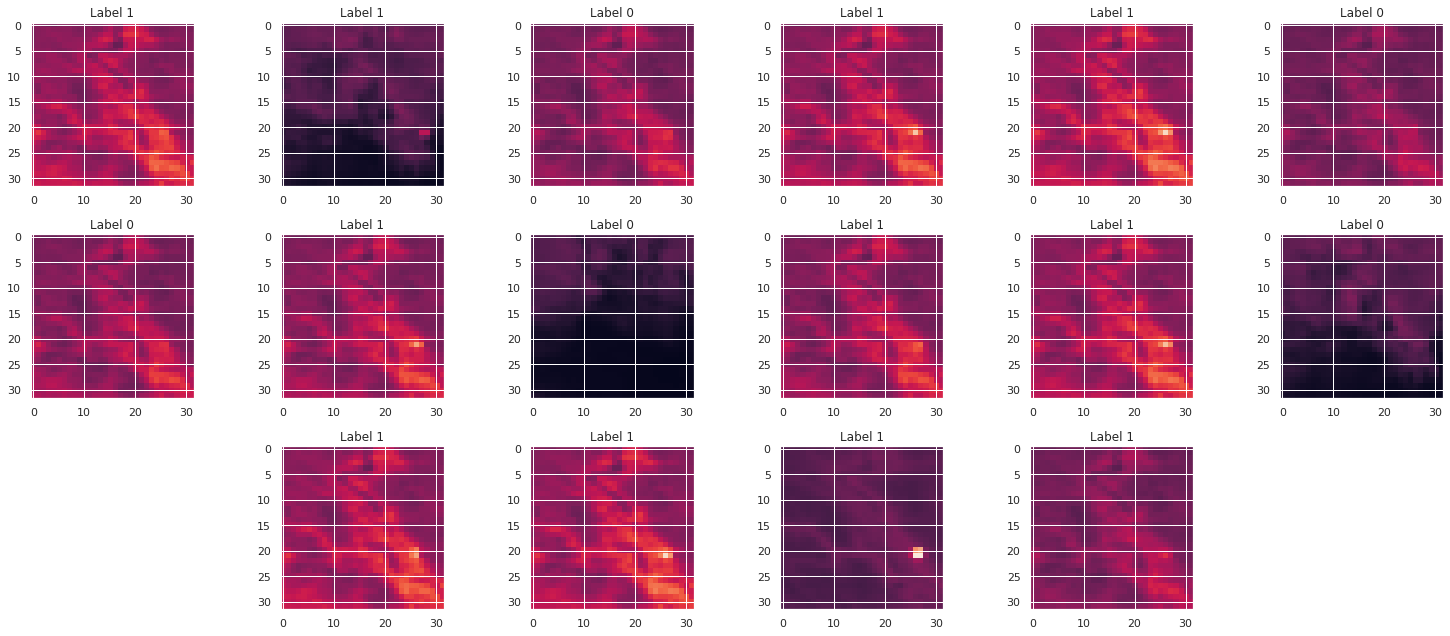

In [10]:
# plot channel 7 timeseries
fig, axs = plt.subplots(3, 6, figsize=(21, 9))

for i in range(3):
    for j in range(6):
        if i* 6 + j <= 16:
            #plt.gray()
            axs[i, j].imshow(channel7List[i* 6 + j], vmin=0, vmax=3)
            seriesStartTime = channel7Name[i* 6 + j].split('_')[3].split('.')[0]
            label = dfLabel.loc[dfLabel['name'] == seriesStartTime, 'fire'].iloc[0]
            axs[i, j].title.set_text('Label {}'.format(label))
            axs[2,5].set_visible(False)
          

fig.delaxes(axs[2, 0])
plt.tight_layout()

In [11]:
def extract_PD_arrays_with_freudenthal_triangulation(data, lower_bound = 0, upper_bound = 8):
    
    f_lower_star = d.fill_freudenthal(np.array(data, dtype='float64'))
    p = d.homology_persistence(f_lower_star)
    dgms = d.init_diagrams(p, f_lower_star)
    birth0=np.array([dgm.birth for dgm in dgms[0]])
    death0=np.array([dgm.death for dgm in dgms[0]])
    death0[death0==np.Infinity] = upper_bound 
    birth1=np.array([dgm.birth for dgm in dgms[1]])
    death1=np.array([dgm.death for dgm in dgms[1]])
    death1[death1==np.Infinity] = upper_bound
   
    return [[birth0,death0],[birth1,death1]]

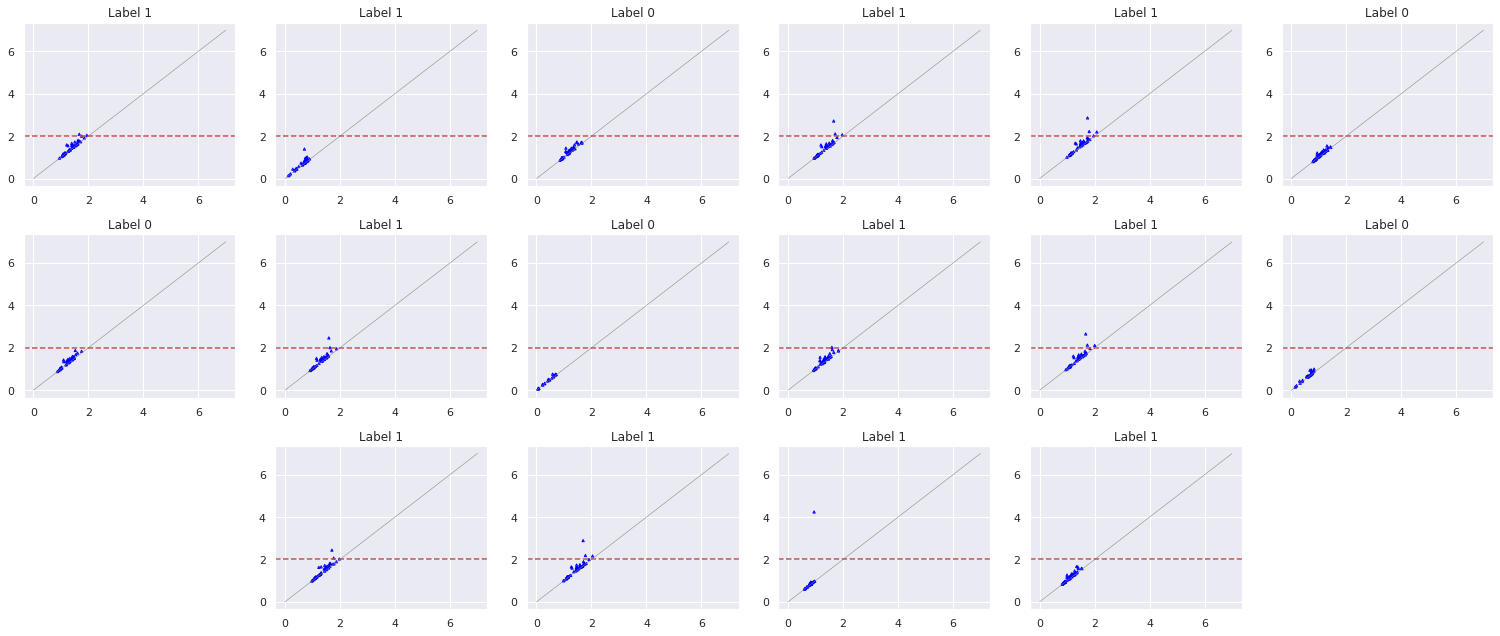

In [12]:
fig, axs = plt.subplots(3, 6, figsize=(21, 9))

pd0_union = []
pd1_union = []
for i in range(3):
    for j in range(6):
        if i* 6 + j <= 16:
            lower_bound = 0
            upper_bound = 8
            
            plt.tight_layout()

            p0, p1 = extract_PD_arrays_with_freudenthal_triangulation(channel7List[i* 6 + j], lower_bound = lower_bound, upper_bound = upper_bound)
            pd0_union.append(p0)
            pd1_union.append(p1)
            #axs[i, j].scatter(birth0, death0, color='r', s=5, label = 'Dimension 0')
            axs[i, j].scatter(p1[0], p1[1], marker='^', s=5, facecolors='none', edgecolor='blue', label = 'Dimension 1')
            axs[i, j].plot(np.arange(lower_bound, upper_bound), np.arange(lower_bound, upper_bound), '-', color='grey', lw=0.5)
            #axs[i, j].plot(np.arange(lower_bound, upper_bound), 2, '-', color='grey', lw=0.5)
            axs[i, j].axhline(y = 2, color='r', linestyle='--')

            seriesStartTime = channel7Name[i* 6 + j].split('_')[3].split('.')[0]
            label = dfLabel.loc[dfLabel['name'] == seriesStartTime, 'fire'].iloc[0]
            axs[i, j].title.set_text('Label {}'.format(label))
            #axs[i, j].set_xlabel('Birth')
            #axs[i, j].set_ylabel('Death')
            axs[2,5].set_visible(False)
          

fig.delaxes(axs[2, 0])
plt.show()

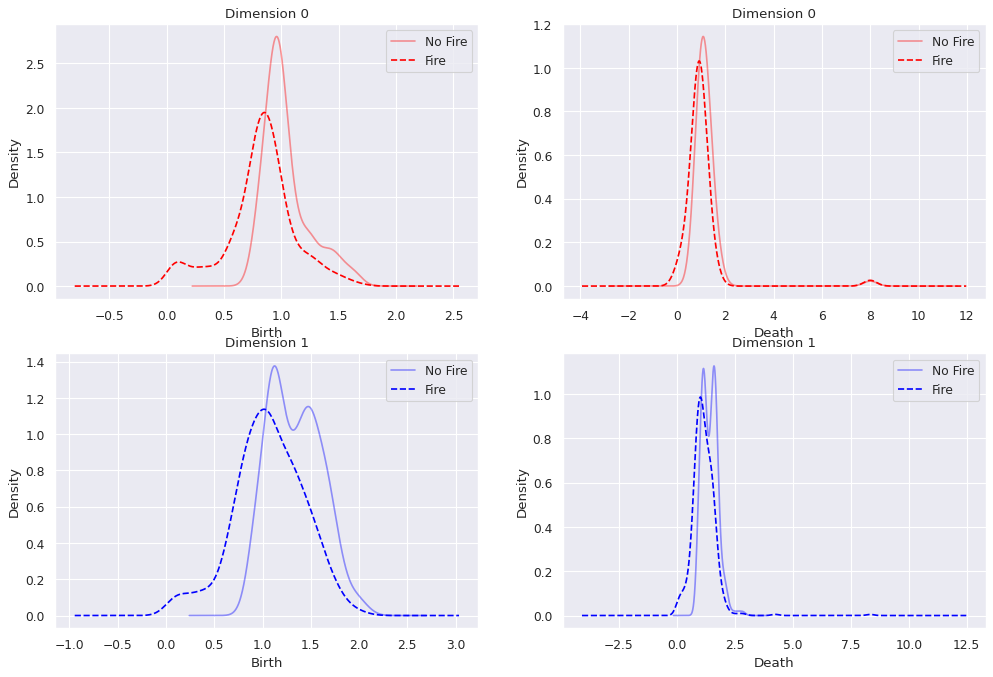

In [15]:
idx0 = [0, 2, 4, 10, 13]
idx1 = [1, 3, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16]

dim0_xs_cl0 = np.array([])
dim0_ys_cl0 = np.array([])
dim1_xs_cl0 = np.array([])
dim1_ys_cl0 = np.array([])
for day in idx0:
    dim0_xs_cl0= np.concatenate((dim0_xs_cl0, pd0_union[day][0]))
    dim0_ys_cl0= np.concatenate((dim0_ys_cl0, pd0_union[day][1]))
    dim1_xs_cl0= np.concatenate((dim1_xs_cl0, pd1_union[day][0]))
    dim1_ys_cl0= np.concatenate((dim1_ys_cl0, pd1_union[day][1]))

dim0_xs_cl1 = np.array([])
dim0_ys_cl1 = np.array([])
dim1_xs_cl1 = np.array([])
dim1_ys_cl1 = np.array([])
for day in idx1:
    dim0_xs_cl1= np.concatenate((dim0_xs_cl1, pd0_union[day][0]))
    dim0_ys_cl1= np.concatenate((dim0_ys_cl1, pd0_union[day][1]))
    dim1_xs_cl1= np.concatenate((dim1_xs_cl1, pd1_union[day][0]))
    dim1_ys_cl1= np.concatenate((dim1_ys_cl1, pd1_union[day][1]))

mydict0x = {'Normal': dim0_xs_cl0, 'Outlier': dim0_xs_cl1}
 
dict_df0x = pd.DataFrame({ key:pd.Series(value) for key, value in mydict0x.items() })

mydict0y = {'Normal': dim0_ys_cl0, 'Outlier': dim0_ys_cl1}
 
dict_df0y = pd.DataFrame({ key:pd.Series(value) for key, value in mydict0y.items() })

mydict1x = {'Normal': dim1_xs_cl0, 'Outlier': dim1_xs_cl1}
 
dict_df1x = pd.DataFrame({ key:pd.Series(value) for key, value in mydict1x.items() })

mydict1y = {'Normal': dim1_ys_cl0, 'Outlier': dim1_ys_cl1}

dict_df1y = pd.DataFrame({ key:pd.Series(value) for key, value in mydict1y.items() })

#plt.figure(num=None, figsize=(25, 15), dpi=80, facecolor='w', edgecolor='k')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), dpi=80)

#pd_dim0_xs_cl0.plot(kind = "hist", density = True, bins = 50) # change density to true, because KDE uses density
dict_df0x['Normal'].plot(ax=axes[0,0],kind = "kde", title="Dimension 0", color='red', style='-', alpha = 0.4, label="No Fire")
dict_df0x['Outlier'].plot(ax=axes[0,0],kind = "kde", title="Dimension 0", color='red', style='--', label="Fire")
axes[0,0].set_xlabel("Birth")
axes[0,0].legend(loc="upper right")

dict_df0y['Normal'].plot(ax=axes[0,1],kind = "kde", title="Dimension 0", color='red', style='-', alpha = 0.4, label="No Fire")
dict_df0y['Outlier'].plot(ax=axes[0,1],kind = "kde", title="Dimension 0", color='red', style='--', label="Fire")
axes[0,1].set_xlabel("Death")
axes[0,1].legend(loc="upper right")

dict_df1x['Normal'].plot(ax=axes[1,0],kind = "kde", title="Dimension 1", color='blue', style='-', alpha = 0.4, label="No Fire")
dict_df1x['Outlier'].plot(ax=axes[1,0],kind = "kde", title="Dimension 1", color='blue', style='--', label="Fire")
axes[1,0].set_xlabel("Birth")
axes[1,0].legend(loc="upper right")

dict_df1y['Normal'].plot(ax=axes[1,1],kind = "kde", title="Dimension 1", color='blue', style='-', alpha = 0.4, label="No Fire")
dict_df1y['Outlier'].plot(ax=axes[1,1],kind = "kde", title="Dimension 1", color='blue', style='--', label="Fire")
axes[1,1].set_xlabel("Death")
axes[1,1].legend(loc="upper right")
# plt.savefig('clusters_2norm.pdf', bbox_inches='tight')
plt.show()


Logistic Regression

In [27]:
!ls

Tile_0_0.zarr	 Tile_14_23.zarr  Tile_20_28.zarr  Tile_3_38.zarr
Tile_0_10.zarr	 Tile_14_24.zarr  Tile_20_29.zarr  Tile_3_3.zarr
Tile_0_11.zarr	 Tile_14_25.zarr  Tile_20_2.zarr   Tile_3_4.zarr
Tile_0_12.zarr	 Tile_14_26.zarr  Tile_20_30.zarr  Tile_3_5.zarr
Tile_0_13.zarr	 Tile_14_27.zarr  Tile_20_31.zarr  Tile_3_6.zarr
Tile_0_14.zarr	 Tile_14_28.zarr  Tile_20_32.zarr  Tile_3_7.zarr
Tile_0_15.zarr	 Tile_14_29.zarr  Tile_20_33.zarr  Tile_3_8.zarr
Tile_0_16.zarr	 Tile_14_2.zarr   Tile_20_34.zarr  Tile_3_9.zarr
Tile_0_17.zarr	 Tile_14_30.zarr  Tile_20_35.zarr  Tile_4_0.zarr
Tile_0_18.zarr	 Tile_14_31.zarr  Tile_20_36.zarr  Tile_4_10.zarr
Tile_0_19.zarr	 Tile_14_32.zarr  Tile_20_37.zarr  Tile_4_11.zarr
Tile_0_1.zarr	 Tile_14_33.zarr  Tile_20_38.zarr  Tile_4_12.zarr
Tile_0_20.zarr	 Tile_14_34.zarr  Tile_20_3.zarr   Tile_4_13.zarr
Tile_0_21.zarr	 Tile_14_35.zarr  Tile_20_4.zarr   Tile_4_14.zarr
Tile_0_22.zarr	 Tile_14_36.zarr  Tile_20_5.zarr   Tile_4_15.zarr
Tile_0_23.zarr	 Tile_14_37.zarr  Ti

In [79]:
DF = pd.read_excel("/content/drive/MyDrive/NASA/DATA/labels..xlsx")

DF.loc[DF["fire"]==1].values[0][5]
DF.shape

(975, 6)

In [133]:
labels = DF["fire"]
x = np.array([channel7List])
y = []
for i=0; i < 17:
  y.append(channel7List[i])
y = np.asarray(y)
print(len(y))
print(x)
x = x.transpose()
logr = LogisticRegression()
logr.fit(x,y)


SyntaxError: ignored